<h2 align="center">Iterative Methods for Solving Equations</h2> 

Solving differential equations numerically can often be much faster than doing so analytically.  The Euler-Cromer method provides a simple solution to solving equations.  Read pages 1-5 of <a href="https://moodle.swarthmore.edu/mod/resource/view.php?id=180998">the PDF provided on Moodle</a> for the basic background information on this method, which we'll use in today's lesson.

Once you've finished that, look at the code below.

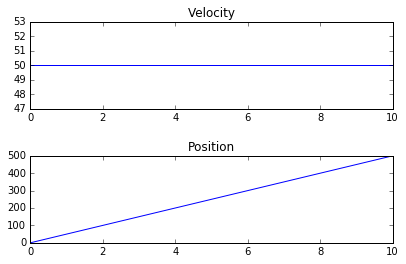

In [2]:
#import lines
%matplotlib inline
import matplotlib.pyplot as mp

def EulerCromer(tfinal, dt, v0):
    '''Euler-Cromer method, takes tfinal (final time), dt (time step), 
    and v0 (initial velocity) as arguments'''
    t = 0 # initial time
    y = 0 # initial position
    a = 0 # no acceleration
    v = v0 # initial velocity

    # Set up position, velocity, and time arrays, initially with one
    # entry each:
    time = [t] 
    ypos = [y] 
    yvel = [v]
    
    while t <= tfinal - dt: # Update variables using Eqs. (1) & (2) 
        v = v + a * dt 
        # Note that this uses the *new* v we just defined in prev. step
        y = y + v * dt

        # Add updated variables to the lists 
        yvel.append(v) 
        ypos.append(y)

        # Increment time 
        t = t + dt 
        time.append(t)
        
    #plot results
    %matplotlib inline
    import matplotlib.pyplot as mp
    mp.subplot(2,1,1)
    mp.plot(time,yvel)
    mp.title("Velocity")
    mp.subplot(2,1,2)
    mp.plot(time,ypos)
    mp.title("Position")
    mp.tight_layout(pad=2)
    mp.show()
    
EulerCromer(10,0.1,50)

These plots show the velocity and position of an object moving at zero accceleration.  This is not particularly interesting.  But the nice thing about solving equations numerically is that it makes it relatively simple to add other effects, which in some cases can be difficult to build into an analytic solution.

*Note:*  In the exercises below, you will write successively more realistic versions of the algorithm above.  For each case, write a new function, copying and pasting code as necessary from your previous cell(s).  Give each new function a different name so that there is no confusion about which function your code is calling.

**Exercise 1** Create a modified version of the code above that includes Earth's gravity.  The acceleration, $a$, will no longer be a constant.  The force of gravity on an object near earth is given by $F = G m M_E / r^2$ where $G = 6.674 \times 10^{-11}$ in SI units and the mass of Earth is $M_E = 5.972 \times 10^{24}$ kg.  Use the radius of the Earth, $R_E = y=6.371 \times 10^6$ m as your starting `y`.  Write your code as a function that takes as an argument the mass of the object, an initial velocity, and a final time.

**Exercise 2** Make a modified version of your code such that the function stops if the object has returned to Earth.  Have the function print the time and speed at which it landed.

**Exercise 3** Modify your code to now include drag.  Quadratic air drag in one dimension can be approximated as an additional acceleration, with a magnitude of $ a_{drag} = \frac{1}{2m} C_D \rho A v^2$ (where $C_D = 0.5$ and $\rho=1.3$ approximately on Earth) and a direction that is *opposite the direction of the velocity*.  Your function should take $A$, the cross-sectional area of the object, as an argument.  For your final test case to turn in, use $A = 1\, m^2$, but play around with other areas to see the effect.  (As you're doing this, think about what physical objects might have the mass and cross-sectional area you're using, and how easy or hard it would be to set them going with a given initial velocity.) 

**Exercise 4** Modify the code again to model a rocket engine, which loses mass as it moves.  The force of the rocket is given by $m a = V (dm/dt)$ with $V$ given by the specific impulse of the rocket fuel, $V = \tau g$. Here $\tau$ = 263 s for the Saturn V rocket fuel and $g$ is the acceleration of gravity.  The Saturn V rocket weighed 2.81 million kg, of which 2.08 million kg was fuel that was burned in 160 s.  Use these numbers to find $dm/dt$ and $V$, and use the equation above to modify your code again to plot the rocket's motion in the first 160 s.

**Exercise 5** Modify your code again to assume that the density of the air ($\rho$) decreases linearly from 1.3 at Earth's surface to zero at 100 km altitude.

**Exercise 6** Determine approximately (within about an order of magnitude) how much mass the Saturn V lifted into low Earth orbit.  In order to reach low Earth orbit, you need to reach approximately 1000 km altitude and have a velocity of 7.8 km/s.  You may want to do this by revising the stop condition in Exercise 2 to stop when it reaches 1000 km.

The next step would be to make this a 2 dimensional calculation, but for the purposes of this lab, we'll stop here.